# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.preprocessing import (KBinsDiscretizer, StandardScaler, OneHotEncoder)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
countries = pd.read_csv("countries.csv")

In [3]:
new_column_names = ["Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"]

countries.columns = new_column_names

## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

In [4]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    object 
 5   Coastline_ratio   227 non-null    object 
 6   Net_migration     224 non-null    object 
 7   Infant_mortality  224 non-null    object 
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    object 
 10  Phones_per_1000   223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    object 
 16  Deathrate         223 non-null    object 
 1

In [5]:
# Esses object são todos números:
countries.iloc[0:,4:].head(2)

,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"


In [6]:
#tranformando todo mundo em float com uma função:
def to_float(str):
    try:
        return float(str.replace(',','.'))
    except:
        return str

countries = countries.applymap(to_float)

In [7]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    float64
 5   Coastline_ratio   227 non-null    float64
 6   Net_migration     224 non-null    float64
 7   Infant_mortality  224 non-null    float64
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    float64
 10  Phones_per_1000   223 non-null    float64
 11  Arable            225 non-null    float64
 12  Crops             225 non-null    float64
 13  Other             225 non-null    float64
 14  Climate           205 non-null    float64
 15  Birthrate         224 non-null    float64
 16  Deathrate         223 non-null    float64
 1

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

In [8]:
# removendo os espaços nas colunas de texto, de duas formas diferentes:
countries.Region = countries.Region.str.strip()
countries['Country'] = countries['Country'].apply(str.strip)

In [9]:
#da pra fazer assim também:
tamanho = countries.Region.nunique() + 1

for i in range(0, tamanho):
    countries.Region[i] = countries.Region[i].strip()

/home/naiara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [10]:
countries.Region.unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

In [11]:
def q1():
    countries.Region = countries.Region.str.strip()
    lista = list(countries.Region.unique())
    return sorted(lista)

q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

Discretizar é separar em intervalos contínuos uma variável numérica. Isso pode ser útil para converter uma variável numérica em categórica, quando o valor exato numérico não for tão importante quanto o intervalo onde ele se encontra.

In [12]:
# vamos criar 10 bins com a mesma quantidade de observações 227/10 ~ 23 observacoes em cada bin
discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
discretizer.fit(countries[['Pop_density']])
bins = discretizer.transform(countries[['Pop_density']])

In [13]:
#Os limites dos intervalos estão disponíveis no atributo bin_edges_
discretizer.bin_edges_

array([array([0.00000e+00, 1.01400e+01, 2.12200e+01, 3.94800e+01, 5.98000e+01,
       7.88000e+01, 1.05540e+02, 1.50120e+02, 2.53700e+02, 3.96740e+02,
       1.62715e+04])], dtype=object)

In [14]:
# para ver os intervalos
def get_interval(bin_idx, bin_edges):
  return f"{np.round(bin_edges[bin_idx], 2):.2f} ⊢ {np.round(bin_edges[bin_idx+1], 2):.2f}"

bin_edges_quantile = discretizer.bin_edges_[0]

print("interval | elements")
for i in range(len(discretizer.bin_edges_[0])-1):
    print(get_interval(i, bin_edges_quantile)," | ",sum(bins[:, 0] == i))

interval | elements
0.00 ⊢ 10.14  |  23
10.14 ⊢ 21.22  |  23
21.22 ⊢ 39.48  |  22
39.48 ⊢ 59.80  |  23
59.80 ⊢ 78.80  |  22
78.80 ⊢ 105.54  |  23
105.54 ⊢ 150.12  |  23
150.12 ⊢ 253.70  |  22
253.70 ⊢ 396.74  |  23
396.74 ⊢ 16271.50  |  23


In [15]:
bins.T

array([[3., 6., 1., 8., 7., 0., 6., 7., 1., 5., 8., 0., 5., 5., 2., 9.,
        9., 9., 3., 8., 1., 4., 9., 3., 0., 5., 0., 2., 7., 4., 4., 3.,
        4., 8., 4., 2., 0., 5., 7., 0., 0., 2., 6., 2., 8., 2., 1., 5.,
        5., 3., 5., 5., 5., 6., 6., 1., 5., 7., 4., 3., 5., 8., 1., 3.,
        2., 4., 2., 3., 1., 6., 0., 4., 0., 6., 9., 4., 7., 5., 9., 5.,
        0., 8., 8., 8., 6., 9., 2., 3., 0., 8., 4., 9., 6., 0., 8., 6.,
        3., 4., 3., 6., 8., 7., 7., 8., 9., 4., 0., 3., 6., 7., 9., 6.,
        2., 2., 2., 8., 4., 2., 0., 7., 3., 7., 9., 5., 2., 6., 4., 9.,
        0., 9., 0., 8., 0., 9., 9., 3., 7., 6., 9., 0., 5., 4., 2., 0.,
        9., 7., 9., 7., 1., 1., 3., 0., 6., 7., 1., 1., 7., 3., 3., 1.,
        1., 2., 8., 6., 6., 8., 4., 8., 5., 0., 8., 1., 6., 8., 2., 8.,
        4., 9., 7., 1., 4., 6., 7., 5., 9., 6., 5., 1., 1., 2., 5., 8.,
        1., 0., 4., 1., 7., 5., 9., 3., 3., 6., 5., 7., 7., 4., 5., 1.,
        3., 9., 6., 4., 2., 7., 2., 1., 4., 1., 2., 8., 3., 3., 

In [16]:
# se eu dividi em 10 partes, meu percentil 90 será o ultimo bloco de valores (os ultimos 10%) quando as bins = 9
int(sum(bins == 9))

23

In [17]:
def q2():
    discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
    discretizer.fit(countries[['Pop_density']])
    bins = discretizer.transform(countries[['Pop_density']])
    return int(sum(bins == 9))

q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [18]:
one_hot_encoder = OneHotEncoder(sparse=False)

countries["Climate"] = countries["Climate"].fillna(0)
climate_encoded = one_hot_encoder.fit_transform(countries[["Climate"]])
data_encoded = pd.concat([countries, pd.DataFrame(climate_encoded, columns=one_hot_encoder.categories_)], axis=1)

In [19]:
countries["Region"] = countries["Region"].fillna(0)
region_encoded = one_hot_encoder.fit_transform(countries[["Region"]])
data_encoded = pd.concat([data_encoded, pd.DataFrame(region_encoded, columns=one_hot_encoder.categories_)], axis=1)
data_encoded.shape

(227, 38)

In [20]:
data_encoded.shape[1] - countries.shape[1]

18

In [21]:
#Facilitando a contagem:
print(countries.Region.unique())
countries.Region.nunique(dropna=False)

['ASIA (EX. NEAR EAST)' 'EASTERN EUROPE' 'NORTHERN AFRICA' 'OCEANIA'
 'WESTERN EUROPE' 'SUB-SAHARAN AFRICA' 'LATIN AMER. & CARIB'
 'C.W. OF IND. STATES' 'NEAR EAST' 'NORTHERN AMERICA' 'BALTICS']


11

In [22]:
#tem que usar o dropna = false pra ele contar o NaN como uma categoria tambem!
print(countries.Climate.unique())
countries.Climate.nunique(dropna=False)

[1.  3.  2.  0.  4.  1.5 2.5]


7

In [23]:
def q3():
    return countries.Region.nunique(dropna=False) + countries.Climate.nunique(dropna=False)

q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

In [24]:
#criando o pipeline
pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("standard_scaler", StandardScaler())
    ])

#usando o pipeline
pipeline.fit(countries._get_numeric_data())
pipeline.transform(countries._get_numeric_data())

array([[ 0.01969468,  0.02758332, -0.19984434, ...,  1.63657562,
        -0.31540576, -1.1611354 ],
       [-0.21387688, -0.31879748, -0.15360296, ...,  0.59516349,
        -0.70631815,  0.08342432],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.32662697,
         2.39091078, -1.67396905],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.08738364,
         1.4286649 , -1.0798325 ],
       [-0.14654488,  0.08642673, -0.21958445, ...,  0.51072467,
         0.06047154, -0.47944188],
       [-0.14029829, -0.11624192, -0.20992568, ...,  0.22222537,
        -0.29285312,  0.08342432]])

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [25]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [26]:
#test_country é uma lista e o modelo não aceita listas, mas aceita dataframes:
test_country_df = pd.DataFrame(data=[test_country], columns=countries.columns)
test_country_df

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Test Country,NEAR EAST,-0.190325,-0.323264,-0.044217,-0.275281,0.132559,-0.805485,1.011978,0.618918,1.007486,0.202399,-0.043679,-0.139297,1.31636,-0.369964,-0.61493,-0.85437,0.263445,0.571242


In [27]:
test_transformed = pipeline.transform(test_country_df._get_numeric_data())
test_transformed

array([[-0.24432501, -0.33489095, -0.22884735, -0.29726002,  0.01959086,
        -1.02861728, -0.96623348, -4.35427242, -1.03720972, -1.04685743,
        -0.55058149, -5.10112169, -0.67138971, -2.02455164, -1.99092137,
        -7.04915046, -0.13915481,  0.03490335]])

In [28]:
#pra ver esses valores no df:
colunas_num = list(countries._get_numeric_data().columns)

test_transformed_df = pd.DataFrame(data=test_transformed, columns=colunas_num)
test_transformed_df

,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,-0.244325,-0.334891,-0.228847,-0.29726,0.019591,-1.028617,-0.966233,-4.354272,-1.03721,-1.046857,-0.550581,-5.101122,-0.67139,-2.024552,-1.990921,-7.04915,-0.139155,0.034903


In [29]:
round(test_transformed_df.Arable[0],3)

-1.047

In [30]:
def q4():
    pipeline = Pipeline(steps=[(
    "imputer", SimpleImputer(strategy="median")),
    ("standard_scaler", StandardScaler())])

    pipeline.fit(countries._get_numeric_data())
    pipeline.transform(countries._get_numeric_data())
    
    test_country_df = pd.DataFrame(data=[test_country], columns=countries.columns)
    test_transformed = pipeline.transform(test_country_df._get_numeric_data())
    colunas_num = list(countries._get_numeric_data().columns)
    test_transformed_df = pd.DataFrame(data=test_transformed, columns=colunas_num)

    return round(test_transformed_df.Arable[0],3)

q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

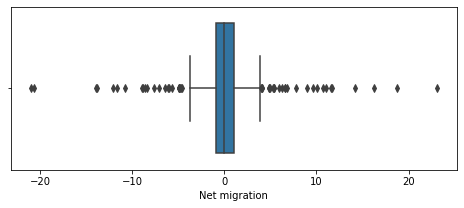

In [31]:
migration = countries.Net_migration.copy()

plt.figure(figsize=(8,3))
sns.boxplot(migration)
plt.xlabel("Net migration");

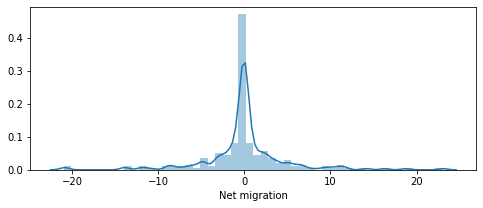

In [32]:
plt.figure(figsize=(8,3))
sns.distplot(migration.dropna())
plt.xlabel("Net migration");

In [33]:
q1, q3 = migration.quantile([0.25, 0.75])
iqr = q3 - q1

lim_sup, lim_inf = q3 + 1.5*iqr, q1 - 1.5*iqr

intervalo = [round(lim_inf,3), round(lim_sup,3)]

print("Faixa limite:", intervalo)

Faixa limite: [-3.815, 3.885]


In [34]:
#ver quais valores estão acima e abaixo dos limites de outlier 
outlier_sup = migration > intervalo[1]
oulier_inf = migration < intervalo[0]

In [35]:
def q5():
    q1, q3 = migration.quantile([0.25, 0.75])
    iqr = q3 - q1

    lim_sup, lim_inf = q3 + 1.5*iqr, q1 - 1.5*iqr

    outlier_sup = migration > lim_sup
    outlier_inf = migration < lim_inf
    
    return sum(outlier_inf), sum(outlier_sup), False

q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [36]:
#o data set 20 newsgroups, que contém milhares de documentos categorizados em 20 grupos 
# (desde astronomia até carros), porém vamos utilizar três:

categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

print('são',len(newsgroup.data),'documentos em',len(categories),'categorias')

são 1773 documentos em 3 categorias


In [37]:
#Exemplo de um documento:
document_idx = 4
documents_total = len(newsgroup.data)

print(f"> Document {document_idx} of {documents_total}:\n\n{newsgroup.data[document_idx]}")
print(f"> Category: {newsgroup.target_names[newsgroup.target[document_idx]]}")

> Document 4 of 1773:

From: npet@bnr.ca (Nick Pettefar)
Subject: Re: Rejetting carbs..
Nntp-Posting-Host: bmdhh299
Organization: BNR Europe Ltd, Maidenhead, UK
X-Newsreader: TIN [version 1.1 PL8]
Distribution: na
Lines: 53

Mark Kromer, on the Thu, 15 Apr 1993 00:42:46 GMT wibbled:
: In an article rtaraz@bigwpi (Ramin Taraz) wrote:

: >Does the "amount of exhaust allowed to leave the engine through the
: >exhaust pipe" make that much of a difference? the amount of air/fuel
: >mixture that a cylender sucks in (tries to suck in) depends on the
: >speed of the piston when it goes down. 

: ...and the pressure in the cylinder at the end of the exhaust stroke.

: With a poor exhaust system, this pressure may be above atmospheric.
: With a pipe that scavenges well this may be substantially below
: atmospheric.  This effect will vary with rpm depending on the tune of
: the pipe; some pipes combined with large valve overlap can actually
: reverse the intake flow and blow mixture out of the ca

In [38]:
# O valor de cada célula, 𝑥𝑖,𝑗, (interseção da linha 𝑖 com a coluna 𝑗) do data set depende da tranformação aplicada.
# Para realizar a contagem de palavras no documento (𝑥𝑖,𝑗), utiliza-se o CountVectorizer()

count_vectorizer = CountVectorizer()
newsgroup_counts = count_vectorizer.fit_transform(newsgroup.data)
words = pd.DataFrame(newsgroup_counts.toarray(), columns=count_vectorizer.get_feature_names())

words.columns

Index(['00', '000', '0000', '0000000004', '0000000005', '0000000667',
       '0000001200', '000005102000', '0001', '000100255pixel',
       ...
       'zyeh', 'zygot', 'zyxel', 'zz', 'zzr11', 'zzr1100', 'zzzzzz', 'ªl',
       '³ation', 'ýé'],
      dtype='object', length=27335)

In [39]:
int(words['phone'].sum())

213

In [40]:
def q6():
    count_vectorizer = CountVectorizer()
    newsgroup_counts = count_vectorizer.fit_transform(newsgroup.data)
    words = pd.DataFrame(newsgroup_counts.toarray(), columns=count_vectorizer.get_feature_names())
    return int(words['phone'].sum())

q6()    

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [1]:
# TF = (número de vezes que o termo aparece em um documento) / (número de termos no documento)
# IDF = log (N / n), em que N é o número de documentos e n é o número de documentos em que um termo apareceu

In [41]:
#tf(𝑡,𝑑), ou term frequency, é uma medida de quantas vezes o termo 𝑡 aparece no documento 𝑑.
#idf(𝑡), ou inverse document frequency, é uma medida de relevância do termo em todos documentos do corpus. 
#O tf-idf é sempre um valor não negativo e quanto mais alto, maior a relevância do termo.

tfidf = TfidfVectorizer()
#Ajustando e transformando os dados:
tfidf_vect = tfidf.fit_transform(newsgroup.data)
tfidf_vect.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
pd.DataFrame(tfidf_vect.toarray(), columns=tfidf.get_feature_names()).head()

,00,000,0000,0000000004,0000000005,0000000667,0000001200,000005102000,0001,000100255pixel,...,zyeh,zygot,zyxel,zz,zzr11,zzr1100,zzzzzz,ªl,³ation,ýé
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.038791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
def q7():
    tfidf = TfidfVectorizer()
    tfidf_vect = tfidf.fit_transform(newsgroup.data)
    
    newsgroups_tfidf = pd.DataFrame(tfidf_vect.toarray(), columns=tfidf.get_feature_names())
    return float(newsgroups_tfidf['phone'].sum().round(3))

q7()

8.888